In [1]:
ls

EV Tweets.zip                    Untitled1.ipynb
EV-Consumer-Behavior-Report.pdf  feather format/
EV_data_preprocessing.ipynb      fol/
Untitled.ipynb


In [2]:
cd feather\ format

/Users/tavishipriyam/Desktop/sem4/EVs/feather format


In [3]:
ls

10                           ALLevTweets_2017-07.feather
ALLevTweets_2011-01.feather  ALLevTweets_2017-08.feather
ALLevTweets_2011-02.feather  ALLevTweets_2017-09.feather
ALLevTweets_2011-03.feather  ALLevTweets_2017-10.feather
ALLevTweets_2011-04.feather  ALLevTweets_2017-11.feather
ALLevTweets_2011-05.feather  ALLevTweets_2017-12.feather
ALLevTweets_2011-06.feather  ALLevTweets_2018-01.feather
ALLevTweets_2011-07.feather  ALLevTweets_2018-02.feather
ALLevTweets_2011-08.feather  ALLevTweets_2018-03.feather
ALLevTweets_2011-09.feather  ALLevTweets_2018-04.feather
ALLevTweets_2011-10.feather  ALLevTweets_2018-05.feather
ALLevTweets_2011-11.feather  ALLevTweets_2018-06.feather
ALLevTweets_2011-12.feather  ALLevTweets_2018-07.feather
ALLevTweets_2012-01.feather  ALLevTweets_2018-08.feather
ALLevTweets_2012-02.feather  ALLevTweets_2018-09.feather
ALLevTweets_2012-03.feather  ALLevTweets_2018-10.feather
ALLevTweets_2012-04.feather  ALLevTweets_2018-11.feather
ALLevTweets_2012-05.feather  AL

In [4]:
import pandas as pd

In [5]:
df1 = pd.read_csv("df_finance2021.csv")

In [6]:
df2 = pd.read_csv("df_infra2021.csv")

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df3 = pd.read_csv("df_policy2021.csv")

In [8]:
df4 = pd.read_csv("df_tech2021.csv")

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
import re
from nltk.corpus import stopwords
import string

In [17]:
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def clean_text(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("\'", "", text)
    tokens = text.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [20]:
from wordcloud import WordCloud

In [21]:
import wordcloud

In [22]:
df1['cleanText'] = df1['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [23]:
df2['cleanText'] = df2['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df3['cleanText'] = df3['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df4['cleanText'] = df4['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [24]:
df1.head()

,Unnamed: 0,attachments,author_id,conversation_id,created_at,entities,id,lang,public_metrics,text,user,referenced_tweets,retweeted_status,in_reply_to_user_id,geo,withheld,cleanText
0,12,NaN,2682930013,1498447366445273088,2022-02-28 23:57:46+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1498447366445273088,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",rt @ighaworth: @tomcottonar “just buy an elect...,"{'created_at': '2014-07-26T17:59:22.000Z', 'de...","[{'id': '1498116336794443780', 'type': 'retwee...","{'attachments': None, 'author_id': '1020580332...",NaN,NaN,NaN,rt @ighaworth: @tomcottonar “just buy an elect...
1,32,NaN,231208574,1498446501596512256,2022-02-28 23:54:20+00:00,"{'annotations': array([{'end': 22, 'normalized...",1498446501596512256,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",rt @sayitnspinit: biden and the democrats want...,"{'created_at': '2010-12-27T22:29:21.000Z', 'de...","[{'id': '1498366798864990208', 'type': 'retwee...","{'attachments': None, 'author_id': '7816398196...",NaN,NaN,NaN,rt @sayitnspinit: biden and the democrats want...
2,59,NaN,1467558778040164352,1498116052374413312,2022-02-28 23:51:12+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1498445714103414784,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",@ighaworth @tomcottonar ever check the price o...,"{'created_at': '2021-12-05T18:18:06.000Z', 'de...","[{'id': '1498116336794443780', 'type': 'replie...","{'attachments': None, 'author_id': '1020580332...",1.020580e+18,NaN,NaN,@ighaworth @tomcottonar ever check the price o...
3,67,NaN,43007868,1498340079751806976,2022-02-28 23:50:20+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1498445495819112448,en,"{'like_count': 1, 'quote_count': 0, 'reply_cou...",@martinheinrich okay. so are you buying the 40...,"{'created_at': '2009-05-28T00:43:09.000Z', 'de...","[{'id': '1498340079751806982', 'type': 'replie...","{'attachments': None, 'author_id': '1099199839...",1.099200e+09,NaN,NaN,@martinheinrich okay. so are you buying the 40...
4,70,NaN,1326812585103134720,1498445469483257856,2022-02-28 23:50:14+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1498445469483257856,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",anytime big daddy government says “our” make s...,"{'created_at': '2020-11-12T09:03:13.000Z', 'de...","[{'id': '1497951427519467528', 'type': 'quoted'}]",{'attachments': {'media_keys': array(['13_1497...,NaN,NaN,NaN,anytime big daddy government says “our” make s...


In [25]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','electric','vehicle','vehicles','car','cars','rt'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
## add electric, vehicle, rts etc in stopwords

data = df4['cleanText'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['keep', 'getting', 'ad', 'opens', 'really', 'tiny', 'supposed', 'comically', 'small', 'compared', 'sedan', 'sized', 'actually', 'selling', 'ever', 'think', 'wait', 'looks', 'perfect']


In [51]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


In [52]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.010*"ev" + 0.010*"charging" + 0.008*"tesla" + 0.007*"new" + '
  '0.007*"station" + 0.006*"big" + 0.005*"range" + 0.005*"battery" + '
  '0.005*"company" + 0.005*"next"'),
 (1,
  '0.009*"ev" + 0.006*"tesla" + 0.006*"one" + 0.005*"year" + 0.005*"amp" + '
  '0.004*"charging" + 0.004*"time" + 0.004*"entire" + 0.004*"get" + '
  '0.004*"buy"'),
 (2,
  '0.011*"charging" + 0.010*"new" + 0.008*"miles" + 0.008*"truck" + '
  '0.007*"tesla" + 0.007*"battery" + 0.007*"would" + 0.007*"one" + '
  '0.006*"charge" + 0.006*"range"'),
 (3,
  '0.013*"charging" + 0.008*"range" + 0.007*"battery" + 0.007*"ev" + '
  '0.006*"station" + 0.005*"get" + 0.005*"energy" + 0.005*"like" + 0.005*"new" '
  '+ 0.004*"amp"'),
 (4,
  '0.007*"new" + 0.006*"tesla" + 0.006*"battery" + 0.005*"truck" + 0.004*"get" '
  '+ 0.004*"gas" + 0.004*"world" + 0.004*"one" + 0.004*"people" + '
  '0.004*"charging"'),
 (5,
  '0.016*"new" + 0.014*"range" + 0.013*"ev" + 0.007*"battery" + 0.007*"amp" + '
  '0.006*"miles" + 0.005*"tesl

In [53]:
import os
import pyLDAvis.gensim_models

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('fol'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'fol'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.006268  0.024461       1        1  13.158236
2      0.018554  0.033296       2        1  12.841263
9     -0.004260  0.003398       3        1  10.992315
7     -0.032100  0.003377       4        1  10.500725
5     -0.014059 -0.060648       5        1  10.216391
6     -0.081436  0.051169       6        1  10.093301
0      0.020852  0.020911       7        1   9.208131
8      0.062575  0.014783       8        1   8.286421
4      0.049655 -0.013987       9        1   7.724812
1     -0.026049 -0.076760      10        1   6.978406, topic_info=         Term         Freq        Total Category  logprob  loglift
74   charging  6854.000000  6854.000000  Default  30.0000  30.0000
57        new  6649.000000  6649.000000  Default  29.0000  29.0000
655    hybrid  2529.000000  2529.000000  Default  28.0000  28.0000
34      tesla  5104.000000  5104.000000  Default  27.0000  27.0000
242        ev  6518.000000  6518.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
537      plug   149.999926  1738.590896  Topic10  -5.9364   0.2122
14      small   145.212085  1476.910995  Topic10  -5.9689   0.3428
38    battery   160.209155  4617.815210  Topic10  -5.8706  -0.6988
46        gas   150.702306  2574.543687  Topic10  -5.9318  -0.1758
185     truck   152.983555  3551.392430  Topic10  -5.9168  -0.4824

[950 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
7511       1  0.037771     aa
7511       4  0.075542     aa
7511       6  0.037771     aa
7511       7  0.755420     aa
7511       8  0.037771     aa
...      ...       ...    ...
37         7  0.083981  years
37         8  0.042306  years
37         9  0.073878  years
37        10  0.051778  years
39304      6  0.910248     ze

[3568 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 10, 8, 6, 7, 1, 9, 5, 2])

In [55]:
import matplotlib.pyplot as plt

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/tavishipriyam/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


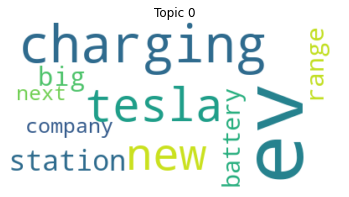

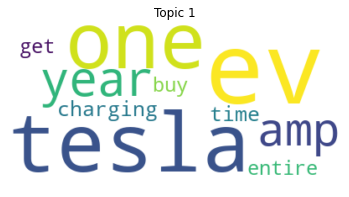

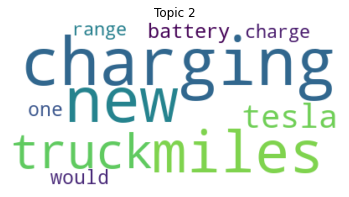

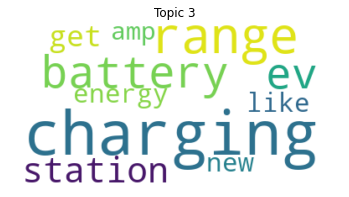

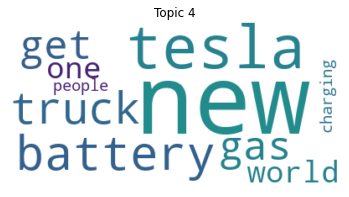

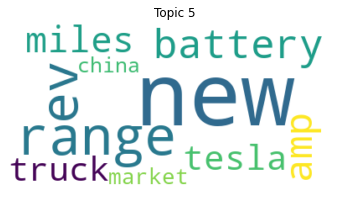

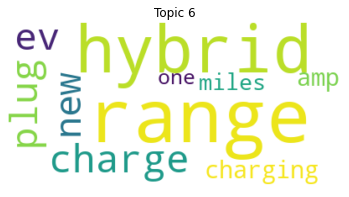

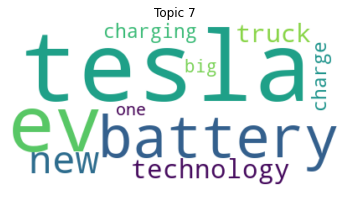

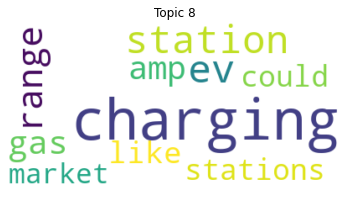

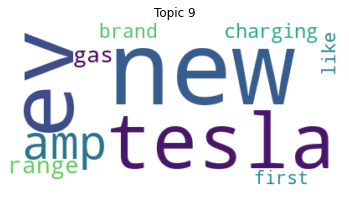

In [57]:
for i in range(0,num_topics):
    create_wordcloud(lda_model, topic=i)
    
    ##inc number of words in plot
    ## subplot
    